Comparing different kernel initializers on MNIST data set.

In [1]:
!pip install mltb==0.0.10

In [2]:
import mltb
import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical
from keras import models
from keras import layers
from keras.callbacks import EarlyStopping

%matplotlib inline

Using TensorFlow backend.


In [3]:
(train_images, train_labels), (val_images, val_labels) = mnist.load_data()

In [4]:
print("train_images.shape:", train_images.shape)
print("train_labels.shape:", train_labels.shape)
print("val_images.shape:", val_images.shape)
print("val_labels.shape:", val_labels.shape)

train_images.shape: (60000, 28, 28)
train_labels.shape: (60000,)
val_images.shape: (10000, 28, 28)
val_labels.shape: (10000,)


In [5]:
train_labels = to_categorical(train_labels)
val_labels = to_categorical(val_labels)

In [6]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

val_images = val_images.reshape((10000, 28 * 28))
val_images = val_images.astype('float32') / 255

In [7]:
def fit(initializer):
    network = models.Sequential()
    network.add(layers.Dense(100, kernel_initializer=initializer, input_shape=(28 * 28,)))
    network.add(layers.Activation('relu'))
    network.add(layers.Dense(100, kernel_initializer=initializer))
    network.add(layers.Activation('relu')) 
    network.add(layers.Dense(10, kernel_initializer=initializer, activation='softmax'))

    network.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
 
    es = EarlyStopping(monitor='val_acc', patience=5, mode='max')
    
    history = network.fit(train_images, train_labels, 
                          validation_data=(val_images, val_labels), 
                          epochs=100, 
                          callbacks=[es],
                          verbose=0,
                          batch_size=128)
    
    best_val_acc = max(history.history['val_acc'])
    
    best_val_acc_epoch = history.history['val_acc'].index(best_val_acc) + 1
    
    return {'best_val_acc' : best_val_acc, 'best_val_acc_epoch' : best_val_acc_epoch}

In [8]:
param_dict = {'lecun_normal' : 'lecun_normal', 
              'lecun_uniform' : 'lecun_uniform', 
              'glorot_normal' : 'glorot_normal', 
              'glorot_uniform' : 'glorot_uniform', 
              'he_normal' : 'he_normal', 
              'he_uniform' : 'he_uniform', 
              'random_normal' : 'random_normal',
              'random_uniform' : 'random_uniform',
              'truncated_normal' : 'truncated_normal',
              #'variance_scaling' : 'variance_scaling',
              'orthogonal' : 'orthogonal',
             }

result = mltb.tools.multi_param_call(fit, param_dict, 1)

Done with lecun_normal - iteration 1 of 1.
Done with lecun_uniform - iteration 1 of 1.
Done with glorot_normal - iteration 1 of 1.
Done with glorot_uniform - iteration 1 of 1.
Done with he_normal - iteration 1 of 1.
Done with he_uniform - iteration 1 of 1.
Done with random_normal - iteration 1 of 1.
Done with random_uniform - iteration 1 of 1.
Done with truncated_normal - iteration 1 of 1.
Done with orthogonal - iteration 1 of 1.


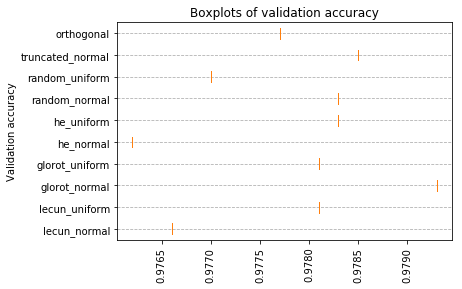

In [9]:
mltb.plot.boxplot_dict(result['best_val_acc'], 
                       ylabel='Validation accuracy', 
                       title='Boxplots of validation accuracy',
                       vert=False
                      )

In [10]:
print('p-value for best_val_acc:', mltb.tools.ttest_combinations(result['best_val_acc']))

p-value for best_val_acc: {('lecun_normal', 'lecun_uniform'): nan, ('lecun_normal', 'glorot_normal'): nan, ('lecun_normal', 'glorot_uniform'): nan, ('lecun_normal', 'he_normal'): nan, ('lecun_normal', 'he_uniform'): nan, ('lecun_normal', 'random_normal'): nan, ('lecun_normal', 'random_uniform'): nan, ('lecun_normal', 'truncated_normal'): nan, ('lecun_normal', 'orthogonal'): nan, ('lecun_uniform', 'glorot_normal'): nan, ('lecun_uniform', 'glorot_uniform'): nan, ('lecun_uniform', 'he_normal'): nan, ('lecun_uniform', 'he_uniform'): nan, ('lecun_uniform', 'random_normal'): nan, ('lecun_uniform', 'random_uniform'): nan, ('lecun_uniform', 'truncated_normal'): nan, ('lecun_uniform', 'orthogonal'): nan, ('glorot_normal', 'glorot_uniform'): nan, ('glorot_normal', 'he_normal'): nan, ('glorot_normal', 'he_uniform'): nan, ('glorot_normal', 'random_normal'): nan, ('glorot_normal', 'random_uniform'): nan, ('glorot_normal', 'truncated_normal'): nan, ('glorot_normal', 'orthogonal'): nan, ('glorot_unif

/usr/local/miniconda3/envs/py36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3157: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/miniconda3/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


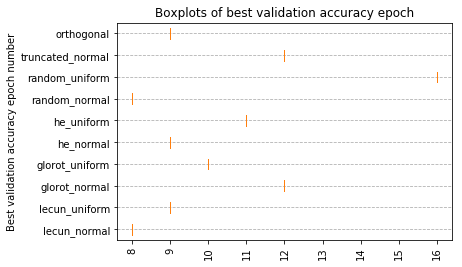

In [11]:
mltb.plot.boxplot_dict(result['best_val_acc_epoch'], 
                       ylabel='Best validation accuracy epoch number', 
                       title='Boxplots of best validation accuracy epoch',
                       vert=False
                      )

In [12]:
print('p-value for best_val_acc_epoch:', mltb.tools.ttest_combinations(result['best_val_acc_epoch']))

p-value for best_val_acc_epoch: {('lecun_normal', 'lecun_uniform'): nan, ('lecun_normal', 'glorot_normal'): nan, ('lecun_normal', 'glorot_uniform'): nan, ('lecun_normal', 'he_normal'): nan, ('lecun_normal', 'he_uniform'): nan, ('lecun_normal', 'random_normal'): nan, ('lecun_normal', 'random_uniform'): nan, ('lecun_normal', 'truncated_normal'): nan, ('lecun_normal', 'orthogonal'): nan, ('lecun_uniform', 'glorot_normal'): nan, ('lecun_uniform', 'glorot_uniform'): nan, ('lecun_uniform', 'he_normal'): nan, ('lecun_uniform', 'he_uniform'): nan, ('lecun_uniform', 'random_normal'): nan, ('lecun_uniform', 'random_uniform'): nan, ('lecun_uniform', 'truncated_normal'): nan, ('lecun_uniform', 'orthogonal'): nan, ('glorot_normal', 'glorot_uniform'): nan, ('glorot_normal', 'he_normal'): nan, ('glorot_normal', 'he_uniform'): nan, ('glorot_normal', 'random_normal'): nan, ('glorot_normal', 'random_uniform'): nan, ('glorot_normal', 'truncated_normal'): nan, ('glorot_normal', 'orthogonal'): nan, ('gloro